In [17]:
import pandas as pd
import numpy as np
import nltk
import matplotlib. pylab as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [18]:
df = pd.read_csv('spam.csv', encoding = "latin-1")
df. head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
df. shape

(5572, 5)

In [22]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
#data cleansing
#dropping columns
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [24]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [25]:
#rename the column
df. rename(columns={"v1":"target", "v2": "text"}, inplace = True)
df. head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
from sklearn. preprocessing import LabelEncoder
lb = LabelEncoder()

In [27]:
df['target'] = lb.fit_transform(df['target'])

In [28]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
# check for duplicate values
df.duplicated().sum()

403

In [30]:
# remove duplicates
df = df.drop_duplicates()

In [31]:
# check for duplicate values
df.duplicated().sum()

0

In [32]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

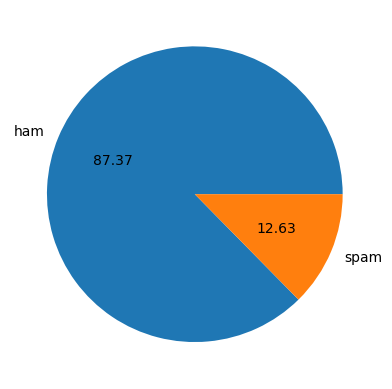

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# Data is imbalanced


In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
df['num_characters'] = df['text'].apply(len)

C:\Users\debna\AppData\Local\Temp\ipykernel_12648\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [36]:
df. head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
#num of words
df['num_words'] = df['text']. apply(lambda x:len(nltk.word_tokenize(x)))
df. head()

C:\Users\debna\AppData\Local\Temp\ipykernel_12648\546790945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text']. apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df['num_sentence'] = df['text']. apply(lambda x:len(nltk. sent_tokenize(x)))
df. head()

C:\Users\debna\AppData\Local\Temp\ipykernel_12648\3992134562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text']. apply(lambda x:len(nltk. sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

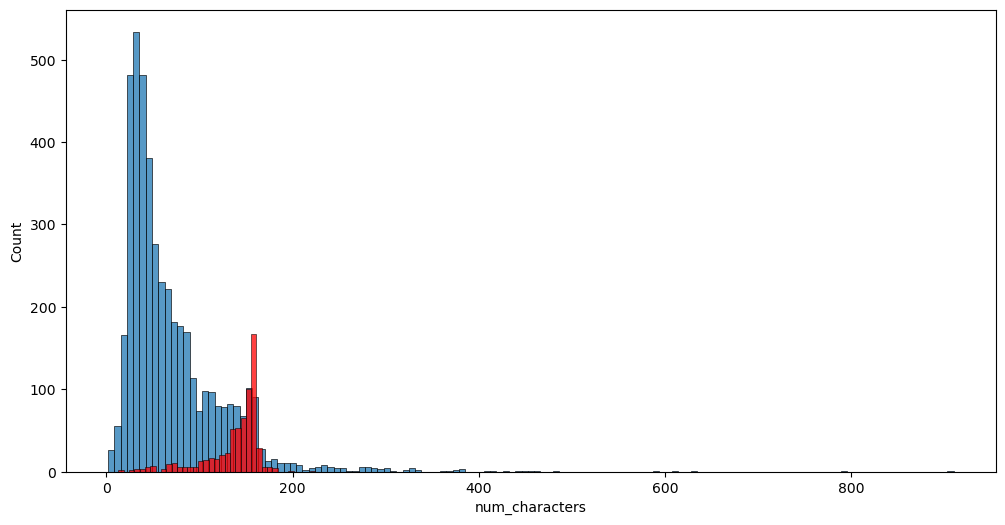

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

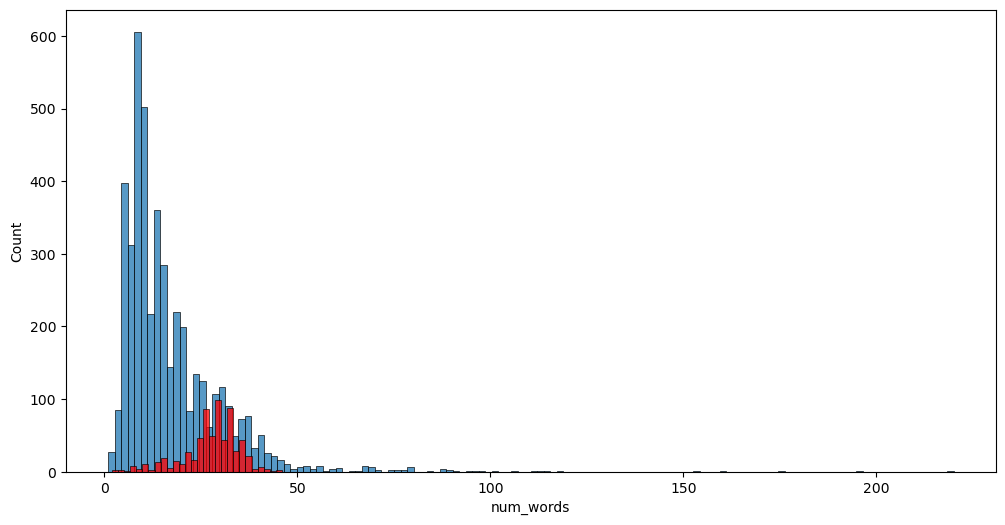

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

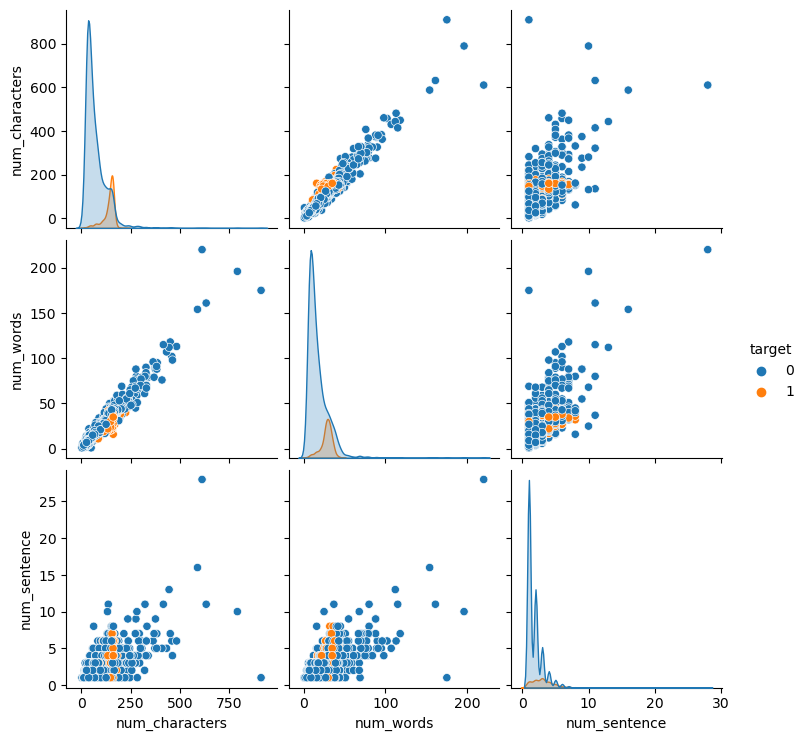

In [43]:
sns.pairplot(df,hue='target')

<AxesSubplot: >

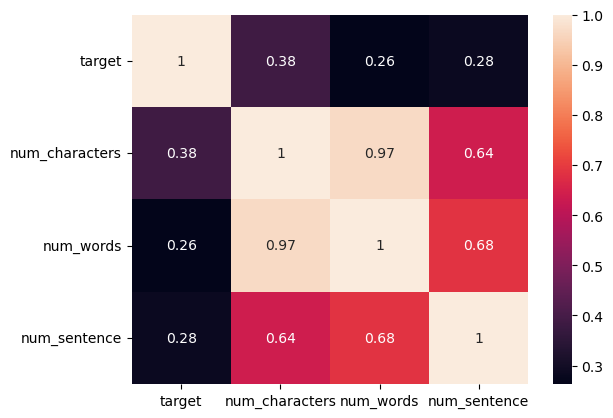

In [44]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [53]:
stop_words = []
# Load the custom built Stopwords
with open("stop.txt","r") as sw:
    stop_words = sw.read()

In [54]:
stop_words

"a\na's\nable\nabout\nabove\naccording\naccordingly\nacross\nactually\nafter\nafterwards\nagain\nagainst\nain't\nall\nallow\nallows\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\nam\namong\namongst\nan\nand\nanother\nany\nanybody\nanyhow\nanyone\nanything\nanyway\nanyways\nanywhere\napart\nappear\nappreciate\nappropriate\nare\naren't\naround\nas\naside\nask\nasking\nassociated\nat\navailable\naway\nawfully\nb\nbe\nbecame\nbecause\nbecome\nbecomes\nbecoming\nbeen\nbefore\nbeforehand\nbehind\nbeing\nbelieve\nbelow\nbeside\nbesides\nbest\nbetter\nbetween\nbeyond\nboth\nbrief\nbut\nby\nc\nc'mon\nc's\ncame\ncan\ncan't\ncannot\ncant\ncause\ncauses\ncertain\ncertainly\nchanges\nclearly\nco\ncom\ncome\ncomes\nconcerning\nconsequently\nconsider\nconsidering\ncontain\ncontaining\ncontains\ncorresponding\ncould\ncouldn't\ncourse\ncurrently\nd\ndefinitely\ndescribed\ndespite\ndid\ndidn't\ndifferent\ndo\ndoes\ndoesn't\ndoing\ndon't\ndone\ndown\ndownwards\nduring\ne\neach\nedu\neg\neight\ne

In [55]:
import re

def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+", " ", i).lower()
#    i = re.sub("[0-9" "]+"," ",i)
    w = []
    for word in i.split(" "):
        if len(word) > 3:
            w.append(word)
    return (" ".join(w))

In [56]:
cleaning_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'until jurong point crazy available only bugis great world buffet cine there amore'

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [58]:
df['transformed_text'] = df['text'].apply(cleaning_text)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,until jurong point crazy available only bugis ...
1,0,Ok lar... Joking wif u oni...,29,8,2,joking
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp final tkts text receive e...
3,0,U dun say so early hor... U c already then say...,49,13,1,early already then
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,think goes lives around here though


In [60]:
# Wordcloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [61]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

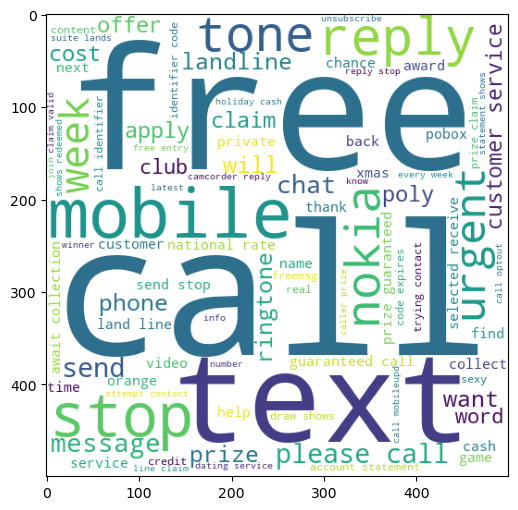

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [63]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

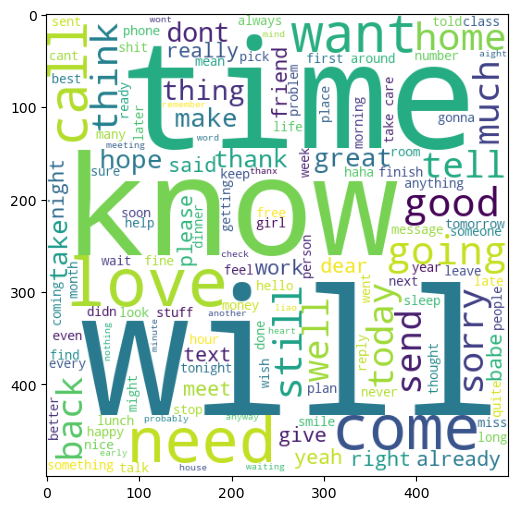

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [70]:
X.shape

(5169, 3000)

In [73]:
y = df['target'].values

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()
Log.fit(X_train,y_train)

LogisticRegression()

In [78]:
print(f'accuracy of Logistic Regression : {Log.score(X_test,y_test)} ')

accuracy of Logistic Regression : 0.9555125725338491 
